# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [1]:
!pip install twitterscraper

  Stored in directory: C:\Users\jhump\AppData\Local\pip\Cache\wheels\45\50\9b\70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
  Stored in directory: C:\Users\jhump\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built twitterscraper bs4


In [2]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
INFO

181

In [6]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [4]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [5]:
al_tweets[0].text

"Hey @suzanneyankovic, where'd I leave my shoes?"

In [7]:
len(austen_tweets + al_tweets)

1141

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [22]:
# Imports
import numpy as np
# from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from random import sample
from sklearn.model_selection import train_test_split

In [14]:
# Preprocess data: encoding, shaping, train/test split
# encoding
austen_text = ''
al_text = ''


def process_tweets(text, tweets):
    for tweet in tweets:  # austen_tweets, al_tweets
        try:
            text += '\n\n' + tweet.text  # austen_text, al_text
        except:
            print('Failed: ' + tweet.text)

    text = text.split('\n\n')
    return text


def encode_tweets(text):    
    chars = list(set(text)) # split and remove duplicate characters. convert to list.

    num_chars = len(chars) # the number of unique characters
    txt_data_size = len(text)
    print("unique characters : ", num_chars)
    print("txt_data_size : ", txt_data_size)
    # one hot encode
    char_to_int = dict((c, i) for i, c in enumerate(chars)) # "enumerate" retruns index and value. Convert it to dictionary
    int_to_char = dict((i, c) for i, c in enumerate(chars))
    # print(char_to_int)
    # print("----------------------------------------------------")
    # print(int_to_char)
    # print("----------------------------------------------------")
    # integer encode input data
    integer_encoded = [char_to_int[i] for i in text] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
    print(integer_encoded)
    print("----------------------------------------------------")
    print("data length : ", len(integer_encoded))
    return integer_encoded

In [15]:
austen_text_procd = encode_tweets(process_tweets(austen_text, austen_tweets))

unique characters :  224
txt_data_size :  227
[0, 197, 195, 51, 53, 206, 215, 67, 120, 17, 144, 212, 182, 58, 205, 94, 57, 171, 209, 127, 78, 156, 121, 11, 49, 43, 148, 15, 160, 133, 64, 214, 80, 165, 83, 19, 219, 128, 25, 84, 181, 211, 44, 9, 6, 183, 213, 192, 33, 56, 103, 75, 169, 70, 24, 31, 185, 199, 98, 172, 8, 88, 81, 79, 161, 131, 223, 190, 69, 35, 196, 122, 76, 28, 125, 194, 191, 77, 26, 104, 222, 198, 20, 61, 36, 102, 30, 38, 123, 167, 27, 105, 173, 117, 29, 47, 62, 207, 153, 54, 39, 65, 157, 21, 177, 22, 193, 158, 40, 154, 108, 217, 166, 73, 200, 129, 170, 146, 3, 201, 63, 164, 18, 124, 184, 145, 149, 179, 140, 109, 147, 96, 87, 175, 142, 187, 174, 135, 100, 48, 130, 155, 85, 150, 7, 141, 37, 12, 186, 113, 151, 168, 218, 136, 4, 55, 134, 106, 101, 41, 55, 1, 46, 111, 92, 60, 132, 137, 202, 107, 72, 178, 52, 143, 112, 16, 32, 114, 216, 203, 13, 188, 180, 50, 34, 90, 210, 82, 86, 185, 89, 176, 10, 59, 42, 95, 66, 93, 23, 115, 68, 159, 45, 91, 97, 99, 110, 138, 126, 208, 204, 18

In [16]:
al_text_procd = encode_tweets(process_tweets(al_text, al_tweets))

unique characters :  965
txt_data_size :  965
[0, 390, 718, 222, 528, 777, 508, 525, 844, 819, 752, 684, 232, 69, 64, 695, 223, 754, 932, 149, 787, 649, 538, 757, 935, 229, 270, 770, 885, 676, 882, 734, 839, 706, 636, 906, 243, 705, 828, 724, 266, 673, 391, 507, 872, 311, 604, 888, 586, 904, 668, 891, 729, 37, 740, 75, 107, 903, 66, 873, 3, 307, 373, 163, 142, 601, 370, 805, 769, 755, 510, 472, 812, 847, 289, 698, 483, 468, 67, 776, 514, 282, 335, 86, 792, 588, 931, 843, 389, 521, 914, 55, 433, 253, 4, 585, 244, 167, 591, 30, 296, 432, 572, 58, 574, 849, 399, 238, 334, 553, 958, 661, 527, 87, 106, 499, 362, 738, 663, 118, 458, 463, 386, 859, 245, 273, 170, 465, 346, 322, 141, 297, 17, 954, 693, 343, 303, 437, 15, 394, 579, 832, 120, 947, 41, 730, 629, 201, 52, 46, 915, 435, 824, 126, 43, 496, 451, 924, 702, 547, 818, 841, 295, 895, 456, 164, 952, 236, 890, 852, 664, 21, 33, 351, 719, 925, 772, 549, 745, 721, 962, 161, 949, 780, 471, 900, 226, 422, 774, 239, 204, 74, 227, 529, 596, 762,

In [23]:
x_train, x_test, y_train, y_test = train_test_split(austen_text_procd, sample(al_text_procd, 227),
                                                    test_size=0.25, random_state=7)

In [25]:
# Fit keras model and report score, accuracy
'''
Proviso: The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- Choice of batch size is important; choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''

max_features = 2000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

# print('Loading data...')

# print(len(x_train), 'train sequences')
# print(len(x_test), 'test sequences')

# print('Pad sequences (samples x time)')
# x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
# x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
# print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Instructions for updating:
Use tf.cast instead.
Train on 170 samples, validate on 57 samples
Epoch 1/15
170/170 [==============================] - 2s 13ms/step - loss: -3.4498 - acc: 0.0000e+00 - val_loss: -11.6550 - val_acc: 0.0000e+00
Epoch 2/15
170/170 [==============================] - 0s 500us/step - loss: -20.1962 - acc: 0.0000e+00 - val_loss: -25.4989 - val_acc: 0.0000e+00
Epoch 3/15
170/170 [==============================] - 0s 509us/step - loss: -39.3440 - acc: 0.0000e+00 - val_loss: -40.7772 - val_acc: 0.0000e+00
Epoch 4/15
170/170 [==============================] - 0s 618us/step - loss: -64.6921 - acc: 0.0000e+00 - val_loss: -57.4691 - val_acc: 0.0000e+00
Epoch 5/15
170/170 [==============================] - 0s 547us/step - loss: -98.7000 - acc: 0.0000e+00 - val_loss:

Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [26]:
!pip install google_images_download

  Stored in directory: C:\Users\jhump\AppData\Local\pip\Cache\wheels\d2\23\84\3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [56]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://vetstreet-brightspot.s3.amazonaws.com/8d/ac/377fecad46d8820697c26efacc32/koi-pond-thinkstock-153560141-335sm61313.jpg
Completed Image ====> 3. koi-pond-thinkstock-153560141-335sm61313.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 4. pkls4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 5. alligator-animal-on-pond.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [28]:
from IPython.display import Image
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions


def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))


def img_contains_frog(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'bullfrog' or 'tree frog' or 'tailed frog':
            return entry[2]
    return 0.0

In [57]:
absolute_image_paths

{'animal pond': ['C:\\git\\LSDS\\DS-Unit-4-Sprint-4-Deep-Learning\\downloads\\animal pond\\downloads\\animal pond\\1. pondanimals.gif',
  'C:\\git\\LSDS\\DS-Unit-4-Sprint-4-Deep-Learning\\downloads\\animal pond\\downloads\\animal pond\\2. hqdefault.jpg',
  'C:\\git\\LSDS\\DS-Unit-4-Sprint-4-Deep-Learning\\downloads\\animal pond\\downloads\\animal pond\\3. koi-pond-thinkstock-153560141-335sm61313.jpg',
  'C:\\git\\LSDS\\DS-Unit-4-Sprint-4-Deep-Learning\\downloads\\animal pond\\downloads\\animal pond\\4. pkls4116_inline.png',
  'C:\\git\\LSDS\\DS-Unit-4-Sprint-4-Deep-Learning\\downloads\\animal pond\\downloads\\animal pond\\5. alligator-animal-on-pond.jpg']}

In [55]:
procd_images = []
for path in absolute_image_paths['animal pond']:
    image = process_img_path(path)
    if img_contains_frog(image):
        print(image, 'has a frog in it.')

AttributeError: 'Image' object has no attribute 'load_img'

In [43]:
import os
os.chdir('downloads\\animal pond')

In [44]:
os.listdir()

['1. pondanimals.gif',
 '2. hqdefault.jpg',
 '3. koi-pond-thinkstock-153560141-335sm61313.jpg',
 '4. pkls4116_inline.png',
 '5. alligator-animal-on-pond.jpg']

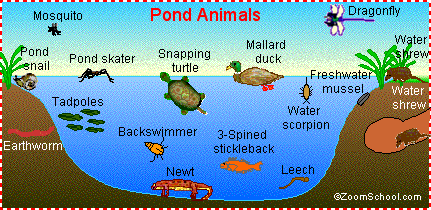

In [46]:
Image(filename='1. pondanimals.gif', width=600)

In [54]:
for image in procd_images:
    print(image, img_contains_frog(process_img_path(image)))

AttributeError: 'Image' object has no attribute 'load_img'

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [0]:
!pip install tpot

    100% |████████████████████████████████| 901kB 18.6MB/s 
    100% |████████████████████████████████| 942kB 18.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/86/5c/dd/c7673fbaccb901ec1a4eb79017fa5b65766805d2a98f954b9a
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot deap stopit


In [0]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

--2019-04-12 05:27:55--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2019-04-12 05:27:56 (24.1 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [0]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [0]:
# TODO - your code!

## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.